# Import Libraries

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from numpy import genfromtxt

# Define the XOR Data Set

In [3]:

X = np.array([
    [1, 1, 1],
    [1, 0, 1],
    [0, 1, 1],
    [0, 0, 1],
])

y = np.array([[0],
              [1],
              [1],
              [0]
             ])

X.shape

(4, 3)

# Define Parameters

In [3]:
# Learning Rate
eta = 3

# Number of epochs for learning
epochs = 1000

# Number of Hidden Neurons
hidden = 15

# Drop out rate probability (drp = 1 means no dropout)
drp = 1

# Define Functions

In [4]:
def sigmoid(x, derivative=False):
    if derivative:
        return x * (1 - x)
    return 1 / (1 + np.exp(-x))

In [5]:
def feedforward(X,mode,k=drp):
    # When training (mode="0") Drop out applies for the hidden layer outputs a_h
    if mode == 0:
        #print("Testing mode activated")
        z_h = np.dot(X, w01)
        a_h = sigmoid(z_h)
        #print("a_h before drop out:", a_h)
        r = np.random.binomial(size=a_h.shape,n=1,p=k)
        a_h *= r
        #print("a_h AFTER drop out, a_h:", a_h)
        #print("\n")
        z_o = np.dot(a_h, w12)
        a_o = sigmoid(z_o)
    
    # When Testing (mode = "1") we use the normal weights w12 (not scaled with p)
    elif mode == 1:
        #print("Training mode activated")
        z_h = np.dot(X, w01)
        a_h = sigmoid(z_h)
        z_o = np.dot(a_h, w12)
        a_o = sigmoid(z_o)
    else:
        print("Must specify 2nd argument '0' for Training or '1' for Test")
        
    return(a_o,a_h)

In [6]:
#test = np.random.rand(*a_h.shape) < drp

In [7]:
#test.shape
#a_h*test

# Initialize the weights

In [8]:
w01 = np.random.random((len(X[0]), hidden))
w12 = np.random.random((hidden, 1))

w01_list = []
w12_list = []
#r = np.random.binomial(size=a_h.shape, n=1, p= 0.5)
#r.shape
#w12.shape


## Start feeding forward and backpropagate *epochs* times.

In [9]:
E_o = []
for epoch in range(epochs):
    if drp == 0.5:
        a_o, a_h = feedforward(X,0,drp)

        # Calculate the error
        a_o_error = ((1 / 2) * (np.power((a_o - y), 2)))
        #print("******** Error after ", epoch, "epochs is ", sum(a_o_error), "*********")
        #print(sum(a_o_error))
        E_o = np.append(E_o, sum(a_o_error))


        # Backpropagation
        ## Output to Hidden Layer weights
        delta_E_o = a_o - y
        delta_a_o = sigmoid(a_o,derivative=True)
        delta_z_o = a_h
        delta_E_w12 = np.dot(delta_z_o.T,(delta_E_o * delta_a_o))


        ## Hidden to Input Layer weights
        delta_E_h = np.dot(delta_E_o * delta_a_o, w12.T)
        delta_a_h = sigmoid(a_h,derivative=True)
        delta_z_h = X
        delta_E_w01 = np.dot(delta_z_h.T, delta_E_h * delta_a_h)


        # Store All weights throughout learning
        w01_list.append(w01)
        w12_list.append(w12)

        # Adjust weights
        w01 = w01 - eta * delta_E_w01
        w12 = w12 - eta * delta_E_w12
        
    elif drp == 1:
        a_o, a_h = feedforward(X,0,drp)
    
        # Calculate the error
        a_o_error = ((1 / 2) * (np.power((a_o - y), 2)))
        #print("******** Error after ", epoch, "epochs is ", sum(a_o_error), "*********")
        #print(sum(a_o_error))
        E_o = np.append(E_o, sum(a_o_error))


        # Backpropagation
        ## Output to Hidden Layer weights
        delta_E_o = a_o - y
        delta_a_o = sigmoid(a_o,derivative=True)
        delta_z_o = a_h
        delta_E_w12 = np.dot(delta_z_o.T,(delta_E_o * delta_a_o))


        ## Hidden to Input Layer weights
        delta_E_h = np.dot(delta_E_o * delta_a_o, w12.T)
        delta_a_h = sigmoid(a_h,derivative=True)
        delta_z_h = X
        delta_E_w01 = np.dot(delta_z_h.T, delta_E_h * delta_a_h)


        # Store All weights throughout learning
        w01_list.append(w01)
        w12_list.append(w12)

        # Adjust weights
        w01 = w01 - eta * delta_E_w01
        w12 = w12 - eta * delta_E_w12


In [10]:
#a_h_r

# Checking dimensions across calculations

In [11]:
    print("")
    print("E_o dimension is ", delta_E_o.shape)
    print("delta_a_o dimension is ", delta_a_o.shape)
    print("delta_z_o dimension is ", delta_z_o.shape)
    print("delta_E_o times delta_a_o dimension is ", (delta_E_o * delta_a_o).shape)
    print("delta_z_o Transpose dimension is", (delta_z_o.T).shape)
    print("Output layer dimension is ", delta_E_w12.shape)
    print("")
    print("delta_E_o times delta_a_o dimension is ", (delta_E_o * delta_a_o).shape)
    print("w12 Transpose dimension is", (w12.T).shape)    
    print("delta_E_h dimension is ", delta_E_h.shape)
    print("delta_a_h dimension is ", delta_a_h.shape)
    print("delta_z_h dimension is ", delta_z_h.shape)
    print("Hidden Layer dimension is ", delta_E_w01.shape)


E_o dimension is  (4, 1)
delta_a_o dimension is  (4, 1)
delta_z_o dimension is  (4, 15)
delta_E_o times delta_a_o dimension is  (4, 1)
delta_z_o Transpose dimension is (15, 4)
Output layer dimension is  (15, 1)

delta_E_o times delta_a_o dimension is  (4, 1)
w12 Transpose dimension is (1, 15)
delta_E_h dimension is  (4, 15)
delta_a_h dimension is  (4, 15)
delta_z_h dimension is  (4, 3)
Hidden Layer dimension is  (3, 15)


In [12]:
#a_h.shape
#r.shape
#r = np.random.binomial(size=a_h.shape,n=1,p=drp)
#r

# Neural Network weights

### Iterating through Epochs and storing learned weights evolution

In [13]:
w01_curve = []
for i in range(w01.shape[0]):
    for j in range(w01.shape[1]):
        for x in range(len(w01_list)):
            #print(w01_list[x][i][j])
            w01_curve.append(w01_list[x][i][j])
            #print("Weights w[",x,"],[",i,"],[",j,"] stored")

### Plotting weights as the NN learns

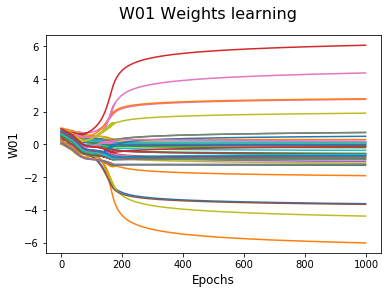

In [14]:
fig = plt.figure()
numberOfWeights = w01.shape[1]*w01.shape[0]
for k in range(numberOfWeights):
    t= w01_curve[(epochs*k):(epochs*(k+1)-1)]
    plt.plot(t)

fig.suptitle('W01 Weights learning', fontsize=16)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('W01', fontsize=12)
fig.savefig('W01_curve.jpg')

## Final trained Weights

In [15]:
print("Input-Hidden Layer weights w01:\n",w01)
print("\nHidden-Output Layer weights w12:\n",w12)


Input-Hidden Layer weights w01:
 [[-3.62485704  0.29506528 -0.5484893  -0.60415023 -0.10239088 -0.88671445
   2.75101858  0.09502483 -4.38193778  0.16129685  0.05769467 -6.02019688
   0.7259811  -0.06262242  0.07728307]
 [-3.66457065 -0.94826493 -0.03427328  0.0764973  -0.36650163 -0.02488276
   2.78485217 -0.20238911  6.05589063 -1.05048375 -0.58413045  4.36360138
   0.72680157 -1.15367893  0.08394448]
 [ 0.49382271 -0.75744938 -0.83558439 -0.74599764 -0.72756477 -0.62587847
   0.19455263 -0.91030713  1.90723517 -0.61035798 -0.69813898 -1.91171274
  -1.28000134 -0.13459013 -1.21992949]]

Hidden-Output Layer weights w12:
 [[-3.74052286]
 [ 0.80230023]
 [ 0.65283133]
 [ 0.66970899]
 [ 0.48075652]
 [ 1.11343533]
 [ 2.84160307]
 [ 0.23329604]
 [-7.79820181]
 [ 1.05154062]
 [ 0.56697829]
 [ 8.3520716 ]
 [-0.85050116]
 [ 1.26068494]
 [ 0.00839936]]



# Error curve - Plot & Save

Minimum Error achieved: 0.0009261539471569205
Epochs run: 1000
Hidden neurons 15
Learning Rate: 3


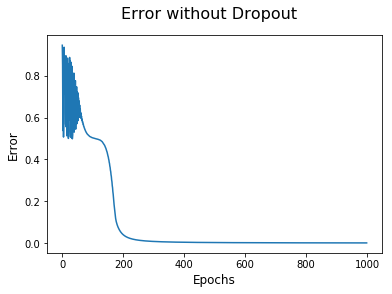

In [16]:

if drp == 1: 
    print("Minimum Error achieved:", min(E_o)) 
    print("Epochs run:", epochs)
    print("Hidden neurons",hidden)
    print("Learning Rate:",eta)
    np.savetxt("Error_nD.csv", E_o, delimiter=",")
    fig = plt.figure()
    plt.plot(E_o)
    fig.suptitle('Error without Dropout', fontsize=16)
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Error', fontsize=12)
    fig.savefig('Error_nD.jpg')
    plt.show()

elif drp == 0.5:
    print("Minimum Error achieved:", min(E_o)) 
    print("Epochs run:", epochs)
    print("Hidden neurons",hidden)
    print("Learning Rate:",eta)
    np.savetxt("Error_D.csv", E_o, delimiter=",")
    fig = plt.figure()
    plt.plot(E_o)
    fig.suptitle('Error with Dropout', fontsize=16)
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Error', fontsize=12)
    fig.savefig('Error_D.jpg')
    plt.show()

else: 
    print("No valid value for Drop out Hyperparameter")

# Testing Run: Learned XOR Output

In [17]:
if drp == 1:
    a_o, a_h = feedforward(X,1)
    np.savetxt("Predicted_Output_nD.csv", a_o, delimiter=",")
    #print("Predicted output:", a_o)
elif drp == 0.5:
    a_o, a_h = feedforward(X,1)
    np.savetxt("Predicted_Output_D.csv", a_o, delimiter=",")
    #print("Predicted output:", a_o)


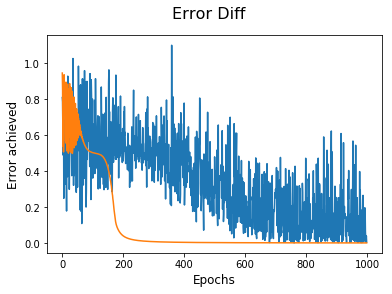

Error without Dropoff 0.0009261539471569205
Predicted output without Dropoff: [0.02639537 0.97818882 0.97823913 0.01427657]

Error with Dropoff 0.0012944173002587592
Predicted output with Dropoff: [0.01426725 0.99360783 0.99988146 0.00220748]


In [18]:

Error_nD = genfromtxt('Error_nD.csv', delimiter=',') 
Error_D = genfromtxt('Error_D.csv', delimiter=',')
Pred_nD = genfromtxt('Predicted_Output_nD.csv', delimiter=',')
Pred_D = genfromtxt('Predicted_Output_D.csv', delimiter=',')


fig = plt.figure()
plt.plot(Error_D)
plt.plot(Error_nD)
fig.suptitle('Error Diff', fontsize=16)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Error achieved', fontsize=12)
fig.savefig('Error Diff.jpg')
plt.show()

print("Error without Dropoff", min(Error_nD))
print("Predicted output without Dropoff:", Pred_nD)
print("\nError with Dropoff", min(Error_D))
print("Predicted output with Dropoff:", Pred_D)